In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
poke = pd.read_csv('pokemon.csv')

In [24]:
poke.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [25]:
poke.drop(['Name'], axis=1, inplace=True)

In [28]:
kind = pd.get_dummies(poke['Type 1'])

In [29]:
poke.drop(['Type 2', 'Type 1'], axis=1, inplace=True)

In [30]:
legend = pd.get_dummies(poke['Legendary'], drop_first=True)

In [31]:
poke_clean = pd.concat([poke,kind,legend], axis=1)

In [32]:
poke_clean.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,True
0,1,318,45,49,49,65,65,45,1,False,...,1,0,0,0,0,0,0,0,0,0
1,2,405,60,62,63,80,80,60,1,False,...,1,0,0,0,0,0,0,0,0,0
2,3,525,80,82,83,100,100,80,1,False,...,1,0,0,0,0,0,0,0,0,0
3,3,625,80,100,123,122,120,80,1,False,...,1,0,0,0,0,0,0,0,0,0
4,4,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0


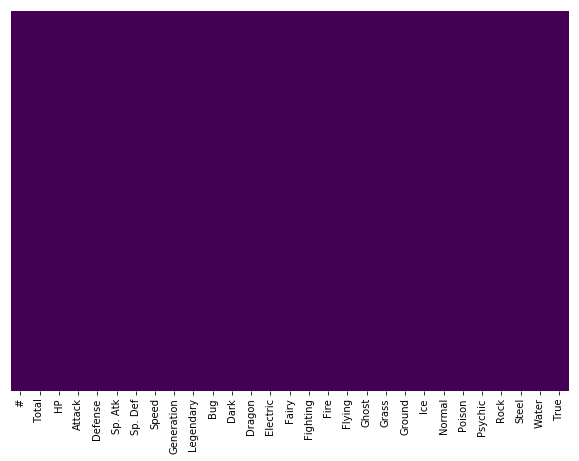

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(poke_clean.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [36]:
X = poke_clean.drop('Legendary', axis=1)
y = poke_clean['Legendary']

In [37]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       243
       True       1.00      0.95      0.98        21

avg / total       1.00      1.00      1.00       264



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,predictions)

array([[243,   0],
       [  1,  20]])